__Content__

- [Objectives](#objectives)

- [Review](#review)

- [Regularization Techniques](#regularization_techniques)

- [Questions](#questions)

- [Appendix](#appendix)

## Objectives 
<a name="objectives"></a>

- Understand what is regularization

- Understand the effect of hyper-parameter $\lambda$ in Ridge and Lasso.

- Understand the similarities and differences between Lasso-Ridge-Linear models.

- Apply Lasso and Ridge with sklearn and understand the parameters.


### Review
<a name="review"></a>



[__Overfitting - Underfitting__](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

<img src="underfitting_overfitting.png" alt="Bias-Variance" style="width: 500px;"/>

[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<img src="bias_variance_trade_off.png" alt="Bias-Variance" style="width: 400px;"/>



__Preliminaries__

Suppose we have a vector:  

$$
  \begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3} \\
           x_{4}
         \end{bmatrix}
  \end{align}
$$

Then the square of the "__L2-norm__" of this vector is given by:

$$ \lvert X \rvert^{2}_{2} = x_{1}^{2} + x_{2}^{2} + x_{3}^{2} +x_{4}^{2} = \sum_{i=1}^{4} x_{i}^{2}$$

Similarly the "__L1-norm__" of the X is given as:

$$ \lvert X \rvert_{1} = \lvert x_{1}\rvert + \lvert x_{2}\rvert + \lvert x_{3}\rvert + \lvert x_{4}\rvert = \sum_{i=1}^{4} \lvert x_{i}\rvert $$

<img src="norms.png" alt="Lasso-Lambda" style="width: 200px;"/>

Examples: Note that if we have two vectors $ \begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3} \\
           x_{4}
         \end{bmatrix}
  \end{align}$   and $ \begin{align}
    Y &= \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           y_{3} \\
           y_{4}
         \end{bmatrix}
  \end{align}$ we can subtract them and get a new vector: $ \begin{align}
    X - Y &= \begin{bmatrix}
           x_{1} - y_{1} \\
           x_{2} - y_{2}\\
           x_{3} - y_{3}\\
           x_{4} - y_{4}
         \end{bmatrix}
  \end{align}$. Then now we can calculate the __L1-norm__ of the new vector $X-Y$ as:
  
  $$ \lvert X-Y \rvert_{1} = \lvert x_{1} - y_{1} \rvert + \lvert x_{2} - y_{2} \rvert + \lvert x_{3} - y_{3} \rvert + \lvert x_{4} - y_{4} \rvert = \sum\limits_{i=1}^{4} \lvert x_{i} - y_{i} \rvert$$
  
  Similarly the __L2-norm__ of this vector is given by:
  
  $$ \lvert X-Y \rvert_{2}^{2} =  (x_{1} - y_{1})^{2} + (x_{2} - y_{2} )^{2} + ( x_{3} - y_{3} )^{2} + ( x_{4} - y_{4} )^{2} =\sum\limits_{i=1}^{4} ( x_{i} - y_{i} )^{2} $$
  
  

__Linear Model__


$$ Y = w_{0} + w_{1}X_1 + w_{2}X_{2} + \cdots + w_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $w_{i}$ 
 
 - Use linear algebra or gradient descent to find parameters to minimize:
 
 Note that the predictions are given by:
 
 $$ \hat{y}_{i} =  w_{0} + w_{1}X_{i1} + w_{2}X_{i2} + \cdots + w_{p}X_{i_p}$$
 
 Therefore individual errors are given by:
 
 $$ e_{i} = y_{i} - \hat{y}_{i} $$
 
 As a result, the residual sum of squares can be expressed as:
 
 $$ RSS(\boldsymbol{w}) = \sum\limits_{i=0}^{N} e_{i}^{2}$$
 
 
 
 $$ J(\boldsymbol{w}) = \sum\limits_{i=0}^{N} (y_{i} - w_{0} - w_{1}X_{i1} - w_{2}X_{i2} - \cdots - w_{p}X_{i_p})^{2} $$
 
 And this equation can be written in short hand as:
 
 $$ J(\boldsymbol{w}) = \rvert \boldsymbol{y} - X \boldsymbol{w} \rvert^{2} $$

### Regularization Techniques

<a name="regularization_techniques"></a>


- Why?

    - Reduces complexity
    
    - Reduce the chance of overfitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    



#### Ridge regularization

Instead of minimizing $J(w)$ (least squares method), we will minimize:

$$ J_{\lambda}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p} w_{i}^{2} $$

#### Lasso regularization

Instead of minimizing $J(\boldsymbol{\omega})$, we will minimize:

$$ J_{\lambda}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p}| w_{i} | $$


In [3]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [4]:
# load data 
df = pd.read_csv('../data/Credit.csv', index_col = 0)

In [5]:
# let's see the head of the dataset
display(HTML(df.head().to_html()))
df.shape

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


(400, 11)

In [6]:
## For the purpose of simplicity let's ignore categorical variables
df2 = df.select_dtypes(exclude='object').loc[:]
df2.drop(columns = 'Balance', inplace = True)

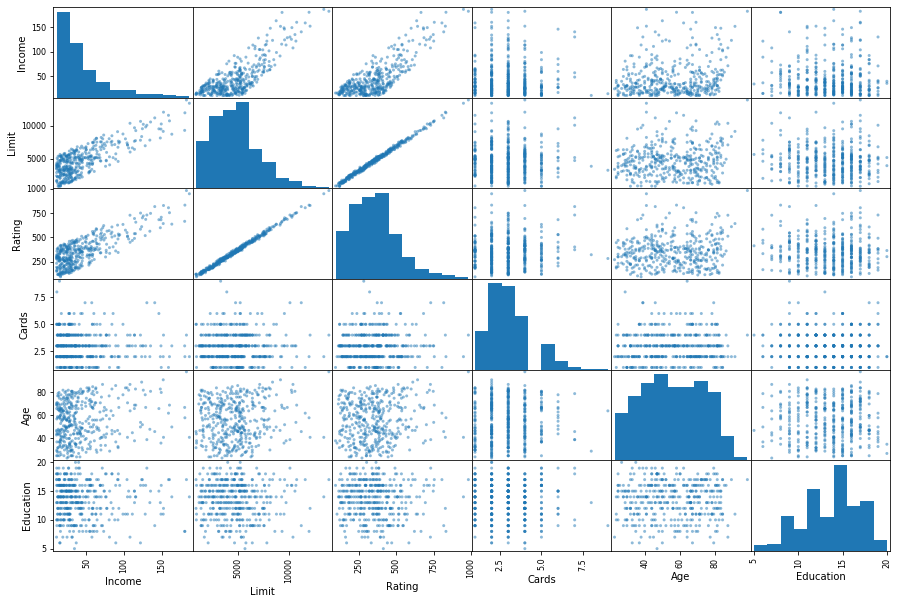

In [7]:
# Scatter_matrix plots are useful tool to see the relationship between columns.
# Note that categorical values omitted automatically
scatter_matrix(df2, figsize = (15,10))
plt.show()

In [8]:
X = df2.values
y = df.Balance.values.reshape(-1,1)

print('Shape of the dataset is:', X.shape)


## Create higher order terms
poly = PolynomialFeatures(degree=4)
Xp = poly.fit_transform(X)

print('After adding higher order terms: ', Xp.shape)

Shape of the dataset is: (400, 6)
After adding higher order terms:  (400, 210)


In [9]:
def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    """
    parameters:
    _________________________
    num_iter: int, number of times fit the models to test data each time with different splitting. 
    note that for each iteration we split the data random train and test parts.
    models: list, list of models that we want to use. Options are 'ols' for simple linear regression
    'ridge' for ridge regression and 'lasso' for lasso regression.
    alpha: float, alpha parameter for ridge and lasso algorithms. Recall that higher values of alpha 
    leads to more regularization.
    complexity: str, either 'simple' or 'polynomial'. We either use the original dataset or 
    a dataset with polynomial powers generated. 
    degree: int, if complexity is polynomial then degree is the degrees of polynomials to be generated.
    return: dict, it returns a dictionary with trained models as values and the 'complexity' parameters as keys.
    """
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    plt.ylim((0.50, 0.99))
    
    plt.legend()
    return sample_models


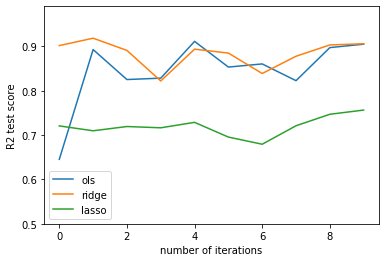

In [10]:
trained_models = model_experiment(num_iter=10, alpha = 100,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 3)

__Your Turn__

- Try different values for alpha --> report your observations

- Change complexity = 'polynomial' and observe the change in the variance of the models. 

- Report your observations.


In [12]:
# After run model_experiment with complexity == 'polynomial'

lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso
lr_lasso.coef_

# compare them with OLS/Ridge models.


array([  0.       ,  -0.       ,   0.       , 286.0867823,   0.       ,
        -0.       ,   0.       ,  -0.       ,   0.       ,   0.       ,
        -0.       ,  -0.       ,  -0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
        -0.       ,  -0.       ,   0.       ,  -0.       ,  -0.       ,
        -0.       ,  -0.       ,  -0.       ,  -0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,  -0.       ,
         0.       ,  -0.       ,  -0.       ,  -0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0. 

In [13]:
# check the coefficients from Lasso
lr_ridge.coef_

# compare them with OLS/Ridge models.

array([[  0.        , -18.53671764,  58.17965901,  58.13723906,
          4.54738655,  -5.59933032,  -5.15621323, -10.53571011,
         -2.22807612,  -3.18678826, -19.4492761 , -15.30686841,
        -20.54812509,  40.04446374,  40.53535373,  31.01229096,
         24.59923782,  36.38210854,  40.92118213,  28.86778144,
         23.03666327,  35.37217786,   1.12471953,  -2.07770367,
         -4.31984938,  -7.97920737,  -4.23494998,  -8.11417243,
         -4.96584507, -10.73875654, -10.85480737, -16.5268444 ,
        -10.12311915, -20.19321127,  -8.84586239,  -8.76556271,
        -12.47549687,  -9.9736308 , -12.08409193,  -8.73323249,
        -13.07000555, -10.42205609, -12.55996344, -20.52297437,
        -18.82805836, -24.48162284, -16.2309472 , -18.53879987,
        -20.65215732,  12.1027276 ,  13.07766793,  19.38848078,
         13.15341367,  21.59703029,  14.02594602,  19.49052099,
         13.14900208,  21.97739225,  10.6749634 ,  10.08208595,
         13.33231861,   2.46978937,  11.

__Effect of Scaling Data__

(array([43., 20., 13., 10.,  5.,  4.,  2.,  0.,  2.,  1.]),
 array([-0.98383431, -0.50391153, -0.02398875,  0.45593403,  0.93585681,
         1.41577959,  1.89570237,  2.37562514,  2.85554792,  3.3354707 ,
         3.81539348]),
 <a list of 10 Patch objects>)

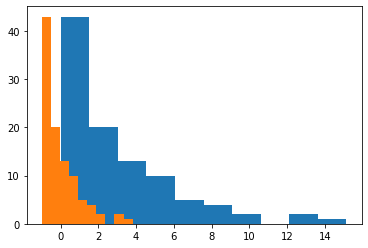

In [74]:
x = np.random.exponential(scale = 3, size = 100)

plt.hist(x)


x_scaled = (x - x.mean())/x.std(ddof = 1)


plt.hist(x_scaled)



#### Effect of $\alpha$ in Lasso and Ridge

<img src="lasso_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<img src="ridge_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<a name='questions'></a>
### Questions



Q. Should I do normalization for Lasso or Ridge?

A. Yes? Why?

Q. When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

Q. How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

Q: How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.

#### Appendix
<a name='appendix'></a>

Here I would like to add some reading material that I found useful while working with the code.


- [pd.get_dummies or OneHotEncoder? - Read second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

- [On dummy variable trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

- Learn.co -- Section-28 Lasso-Ridge

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/) 2.2.2 The Bias-Variance Trade-off and 6.2 Shrinkage Methods




Image Sources in order of appearance: 
- https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205


